# Import Statements

In [19]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import os

# Reading the files

## Directory defining

In [20]:
data_dir = "A,B,CNNS_with_Tim"
train = os.path.join(data_dir, "veggie_heap_training")
test= os.path.join(data_dir, "veggie_heap_testing")

In [21]:
train

'A,B,CNNS_with_Tim/veggie_heap_training'

In [22]:
test

'A,B,CNNS_with_Tim/veggie_heap_testing'

## Image genertaor

In [23]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
train_OMG = train_datagen.flow_from_directory(
    train,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)


Found 7872 images belonging to 12 classes.


In [25]:
val_OMG = train_datagen.flow_from_directory(
    train,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1963 images belonging to 12 classes.


In [26]:
test_OMG = test_datagen.flow_from_directory(
    test,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 2424 images belonging to 12 classes.


# Model

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(train_OMG.class_indices), activation='softmax')
])

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 12)             │         6,156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,039,820 (72.63 MB)

 Trainable params: 19,039,820 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

# Training

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history = model.fit(
    train_OMG,
    validation_data=val_OMG,
    epochs=20,
    verbose=1
)

Epoch 1/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 154s 623ms/step - accuracy: 0.4410 - loss: 1.7283 - val_accuracy: 0.8839 - val_loss: 0.3926
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 153s 621ms/step - accuracy: 0.8479 - loss: 0.4603 - val_accuracy: 0.9073 - val_loss: 0.2875
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 154s 626ms/step - accuracy: 0.9168 - loss: 0.2582 - val_accuracy: 0.9496 - val_loss: 0.1695
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 153s 622ms/step - accuracy: 0.9409 - loss: 0.1929 - val_accuracy: 0.9598 - val_loss: 0.1378
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 154s 624ms/step - accuracy: 0.9583 - loss: 0.1253 - val_accuracy: 0.9633 - val_loss: 0.1321
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 151s 615ms/step - accuracy: 0.9660 - loss: 0.1040 - val_accuracy: 0.9414 - val_loss: 0.1848
Epoch 7/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 152s 618ms/step - accuracy: 0.9656 - loss: 0.1060 - val_accuracy: 0.9689 - val_loss: 0.1175
Epoch 8/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 153s 623ms/step - accuracy: 0.9806 -

# Ploting Graphs

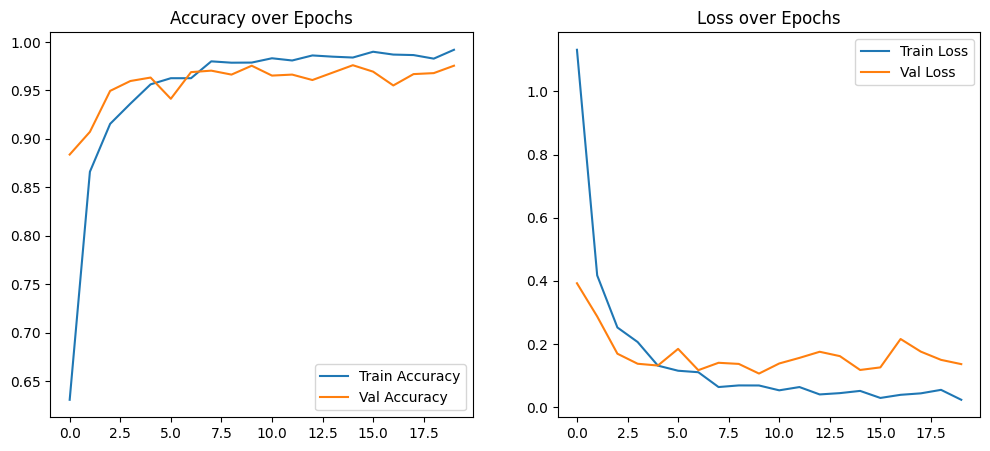

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
    
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

# Testing

## Predictions

In [35]:
predictions = model.predict(test_OMG)
y_pred = np.argmax(predictions, axis=1)
y_true = test_OMG.classes

76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step


## Confusion matrix

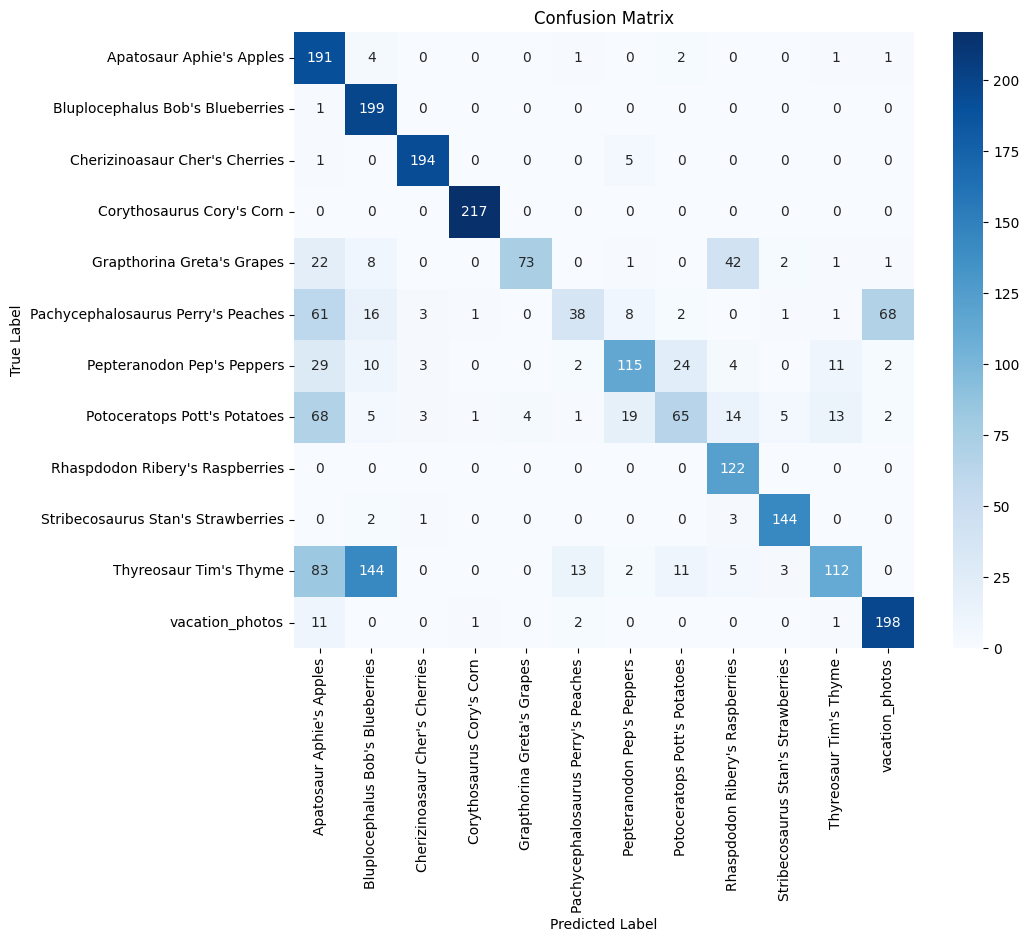

In [38]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_OMG.class_indices.keys(), yticklabels=test_OMG.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification report

In [42]:
print(classification_report(y_true, y_pred, target_names=test_OMG.class_indices.keys()))

                                    precision    recall  f1-score   support

          Apatosaur Aphie's Apples       0.41      0.95      0.57       200
  Bluplocephalus Bob's Blueberries       0.51      0.99      0.68       200
    Cherizinoasaur Cher's Cherries       0.95      0.97      0.96       200
         Corythosaurus Cory's Corn       0.99      1.00      0.99       217
        Grapthorina Greta's Grapes       0.95      0.49      0.64       150
Pachycephalosaurus Perry's Peaches       0.67      0.19      0.30       199
        Pepteranodon Pep's Peppers       0.77      0.57      0.66       200
      Potoceratops Pott's Potatoes       0.62      0.33      0.43       200
   Rhaspdodon Ribery's Raspberries       0.64      1.00      0.78       122
Stribecosaurus Stan's Strawberries       0.93      0.96      0.94       150
            Thyreosaur Tim's Thyme       0.80      0.30      0.44       373
                   vacation_photos       0.73      0.93      0.82       213

          